In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/telecommunications_churn (1).csv')
df


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0


In [ ]:
# Preview the data
df.head()


,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


data cleaning and preprocessing

In [ ]:
import pandas as pd

#  Normalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '_')

#  Check for missing values
print("Missing values:\n", df.isnull().sum())

#  Convert 'yes'/'no' to binary
binary_cols = ['voice_mail_plan', 'international_plan', 'churn']
for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].astype(str).str.lower().map({'yes': 1, 'no': 0})
    else:
        print(f"Column '{col}' not found. Skipping.")

#  One-hot encode 'state' column
if 'state' in df.columns:
    df = pd.get_dummies(df, columns=['state'], drop_first=True)

#  Drop 'area_code' column if it exists
if 'area_code' in df.columns:
    df.drop('area_code', axis=1, inplace=True)

# Preview cleaned data
print("\nCleaned Data Sample:")
print(df.head())


Missing values:
 account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_calls               0
night_charge              0
international_calls       0
international_charge      0
total_charge              0
churn                     0
dtype: int64

Cleaned Data Sample:
   account_length  voice_mail_plan  voice_mail_messages  day_mins  \
0             128              NaN                   25     265.1   
1             107              NaN                   26     161.6   
2             137              NaN                    0     243.4   
3              84              NaN                    0     299.4   
4              75              NaN                    0     166.7   

 

exploratory data analysis

In [ ]:
#  Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

#  Unique values in categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

#  Churn distribution check
if 'churn' in df.columns:
    print("\nChurn Value Counts:")
    print(df['churn'].value_counts(dropna=False))



Summary Statistics:
       account_length  voice_mail_plan  voice_mail_messages     day_mins  \
count     3333.000000              0.0          3333.000000  3333.000000   
mean       101.064806              NaN             8.099010   179.775098   
std         39.822106              NaN            13.688365    54.467389   
min          1.000000              NaN             0.000000     0.000000   
25%         74.000000              NaN             0.000000   143.700000   
50%        101.000000              NaN             0.000000   179.400000   
75%        127.000000              NaN            20.000000   216.400000   
max        243.000000              NaN            51.000000   350.800000   

       evening_mins   night_mins  international_mins  customer_service_calls  \
count   3333.000000  3333.000000         3333.000000             3333.000000   
mean     200.980348   200.872037           10.237294                1.562856   
std       50.713844    50.573847            2.791840  

data visualization

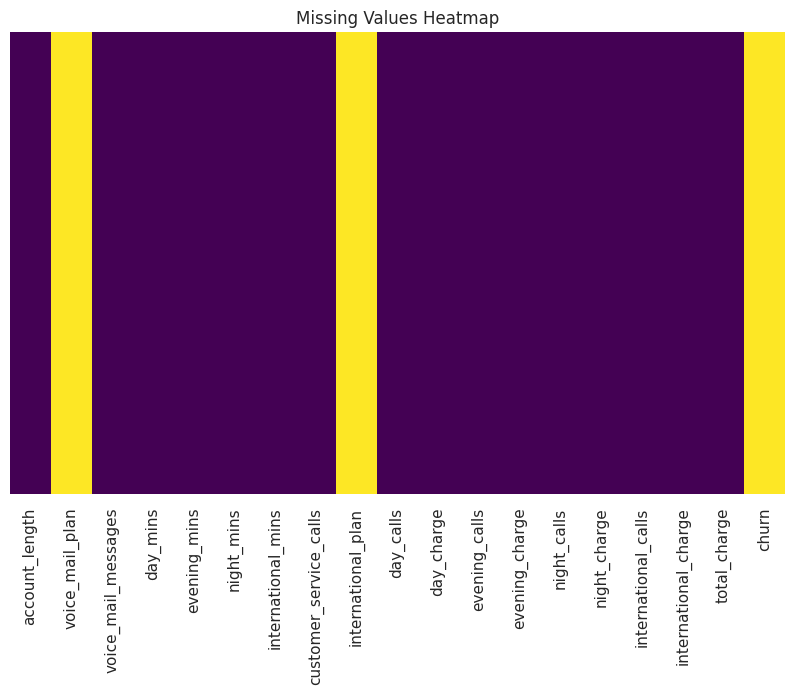

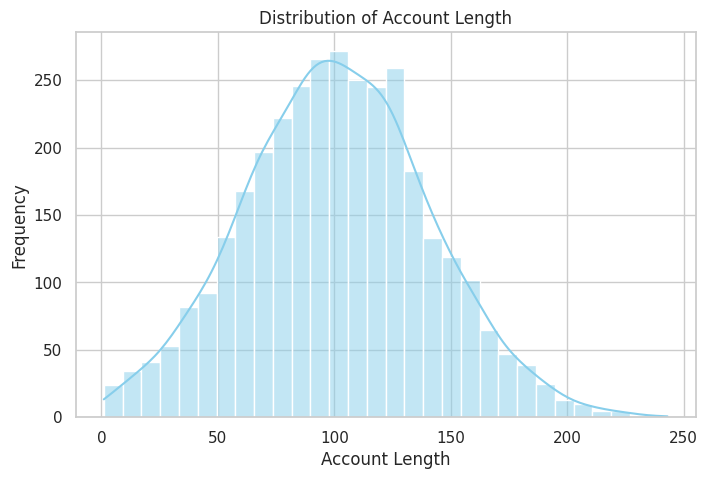

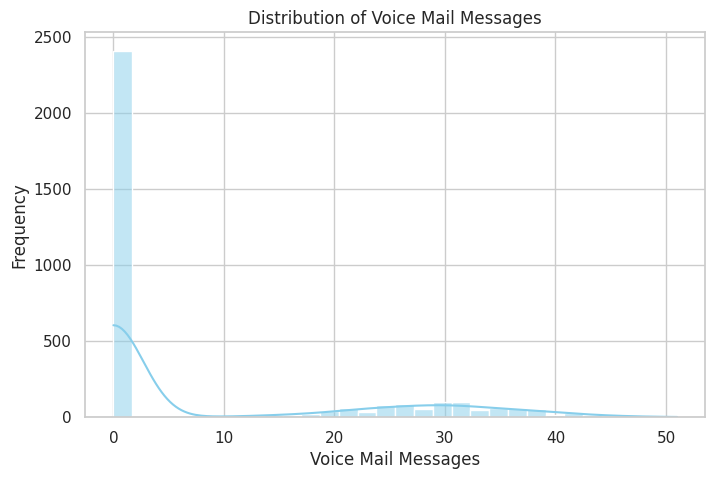

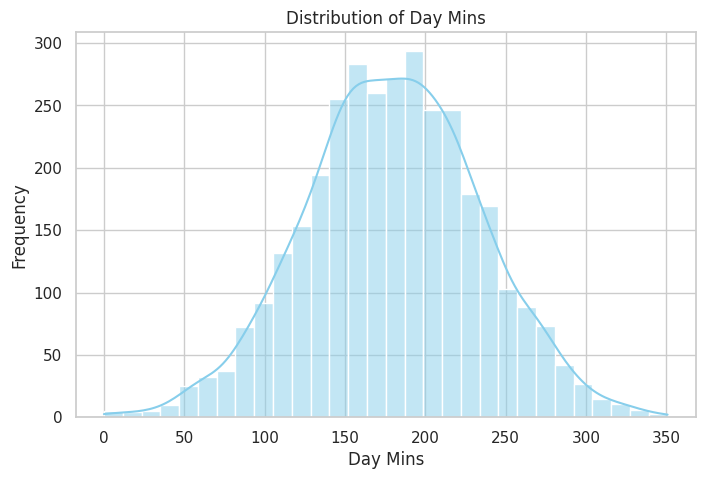

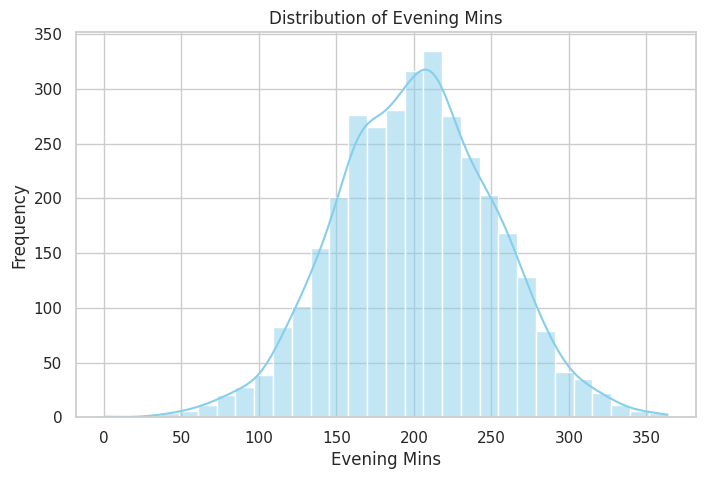

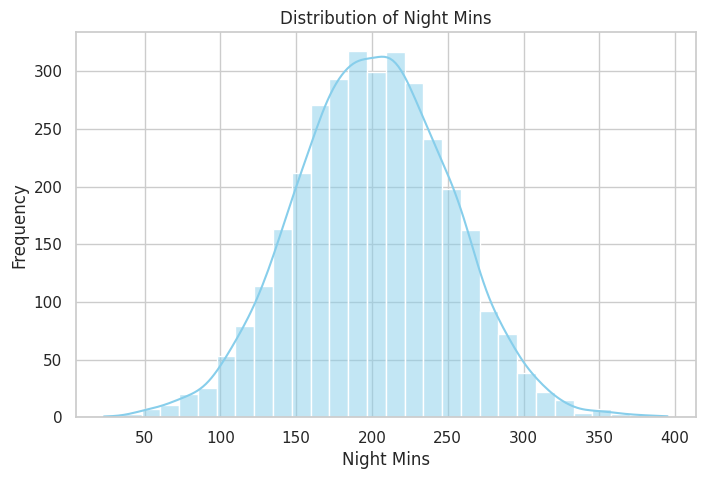

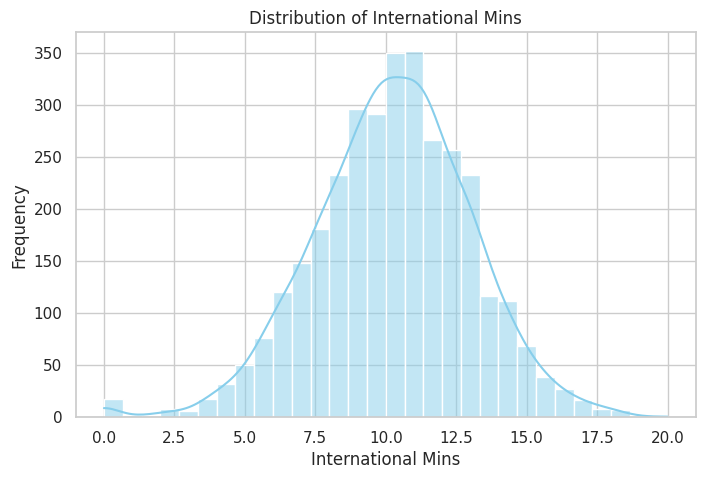

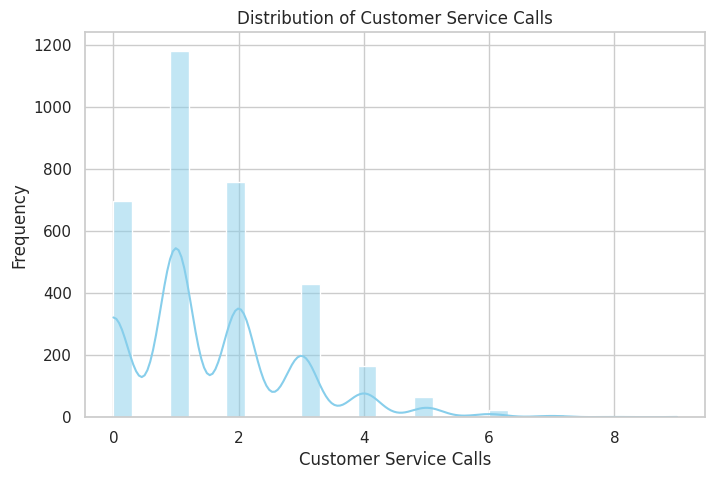

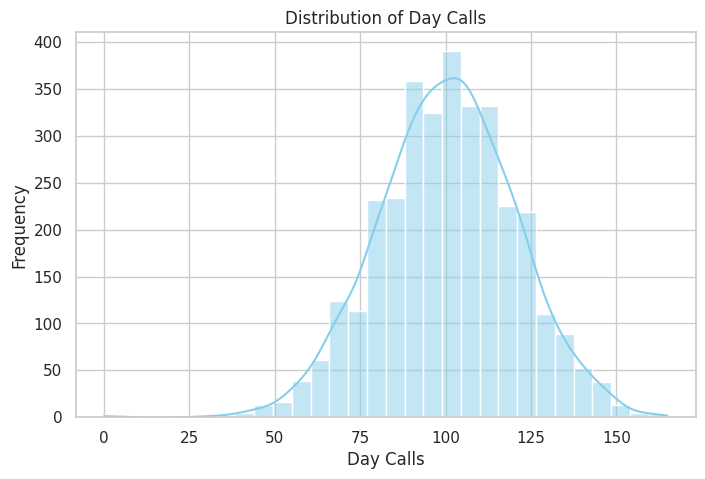

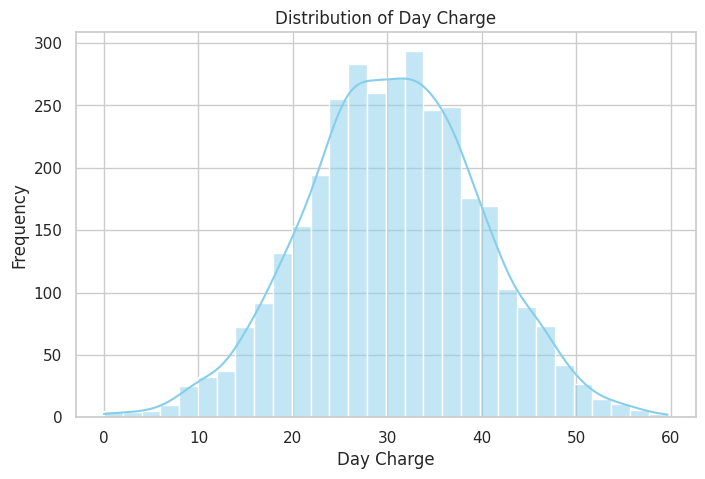

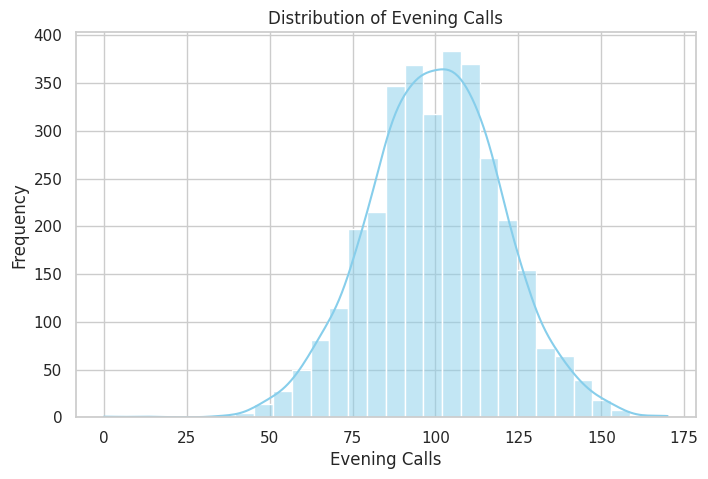

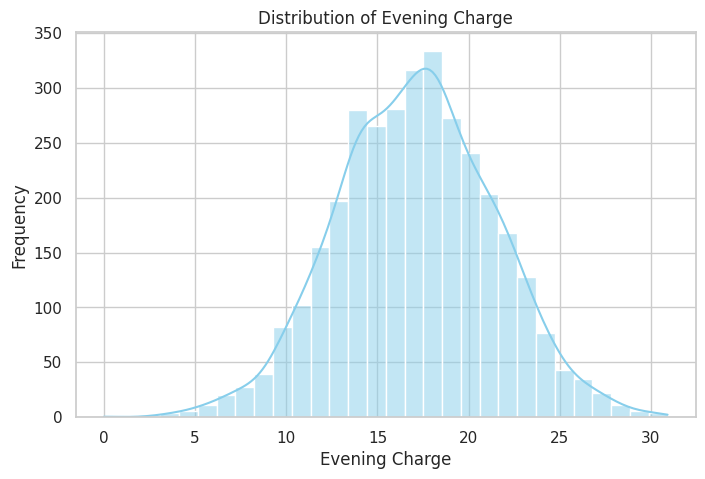

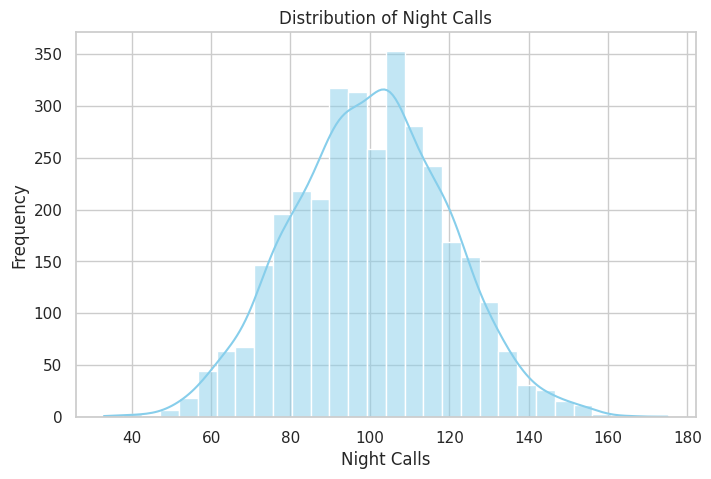

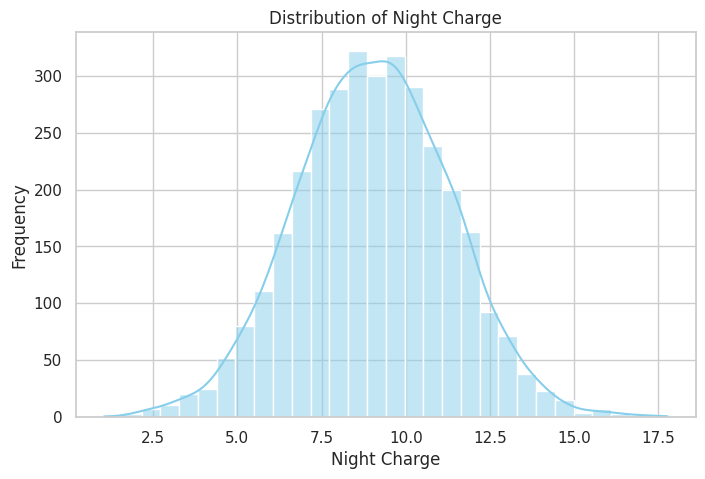

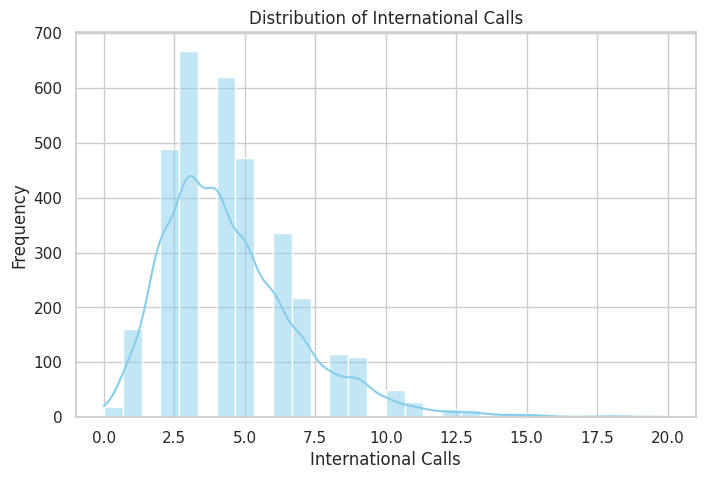

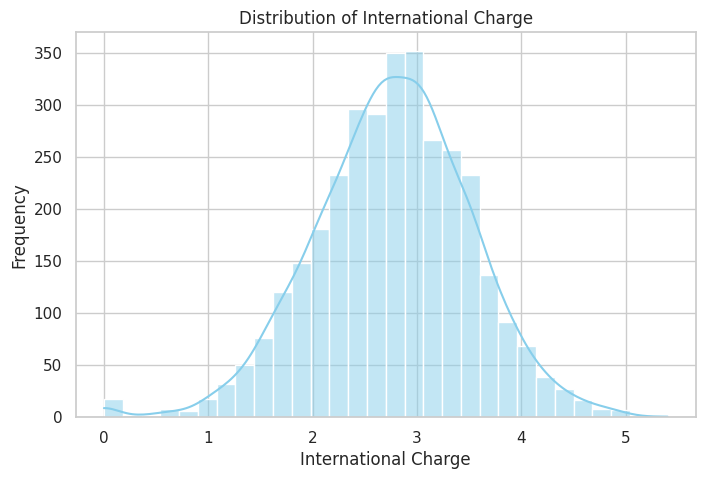

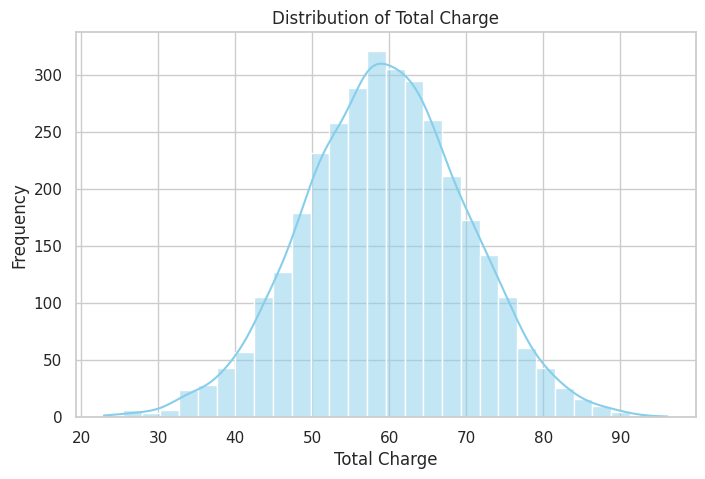

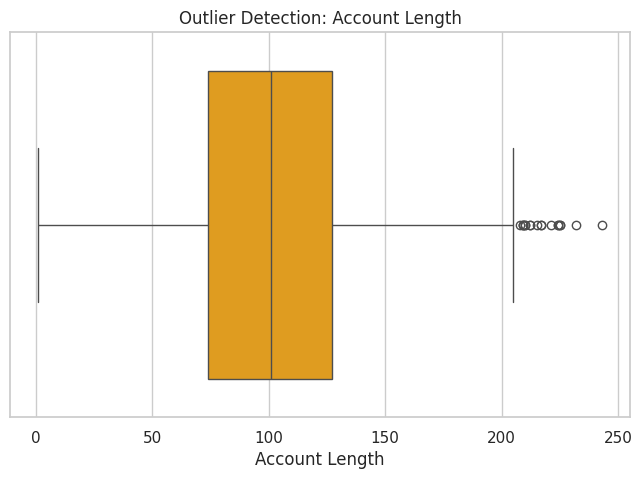

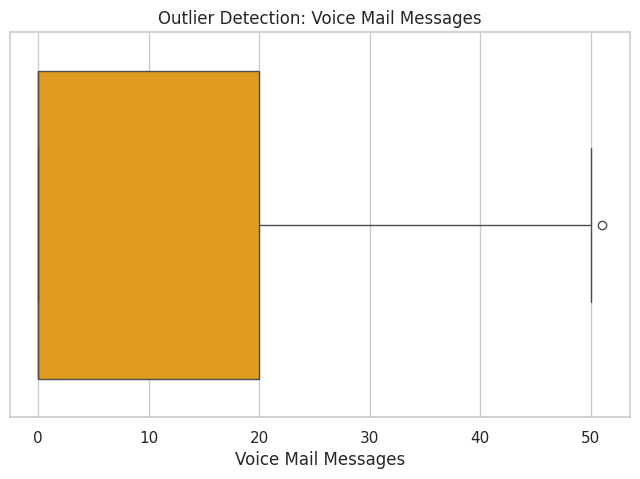

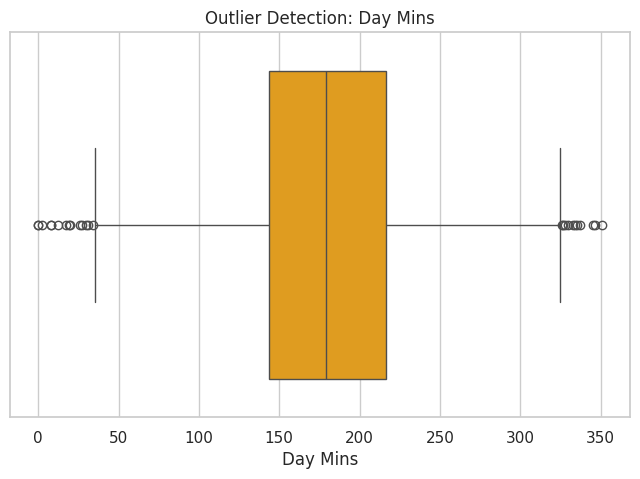

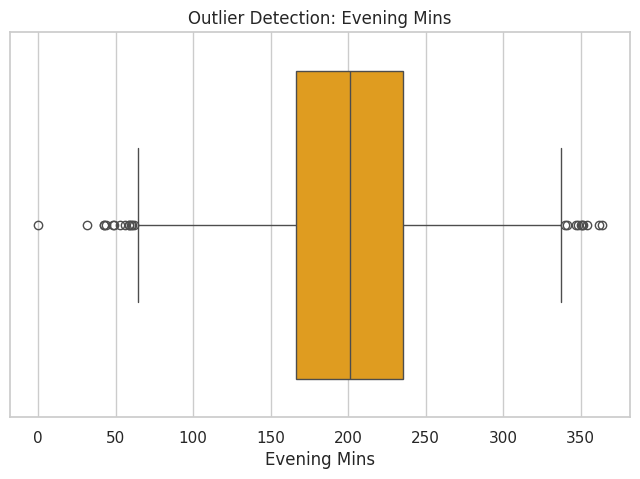

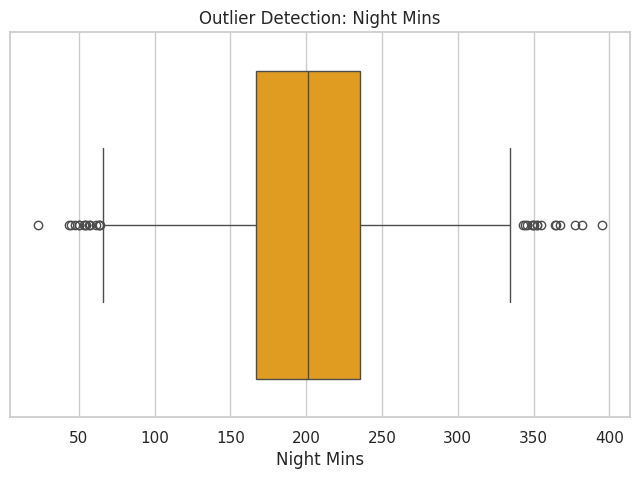

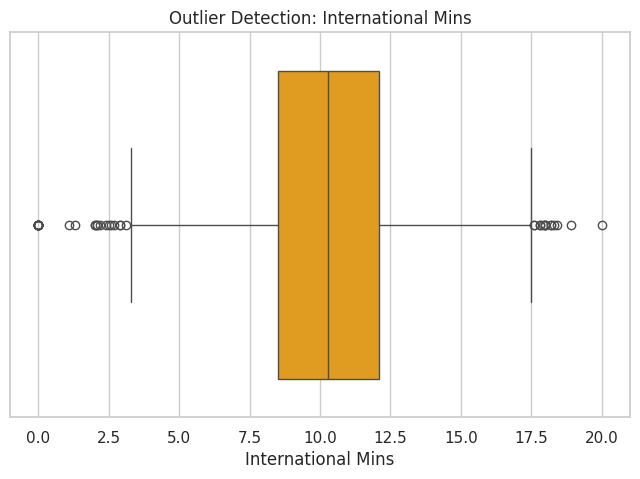

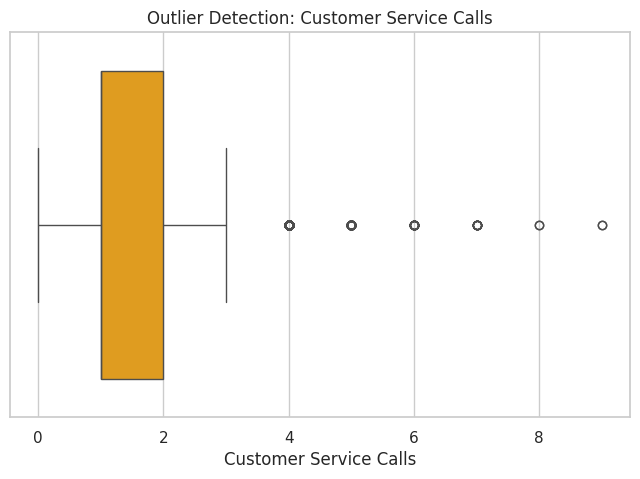

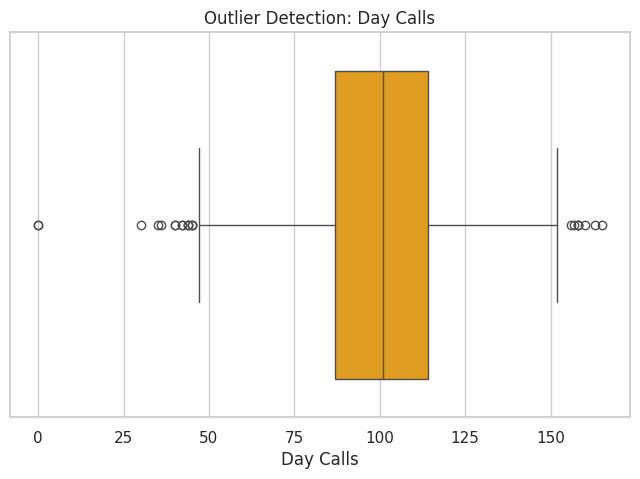

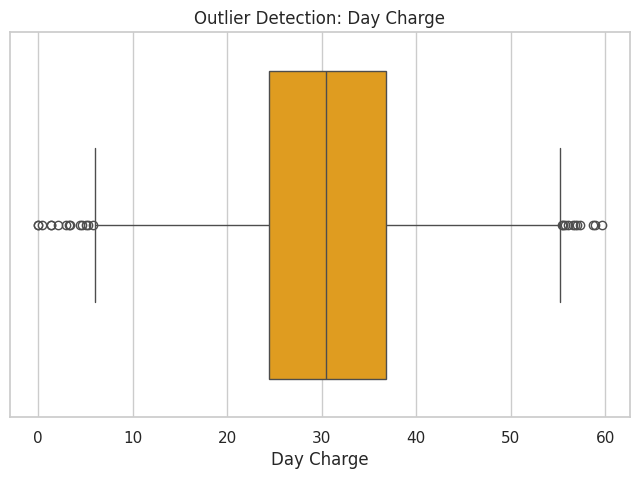

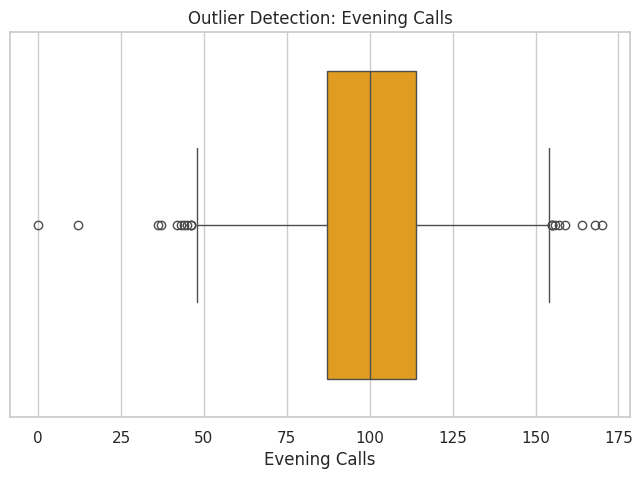

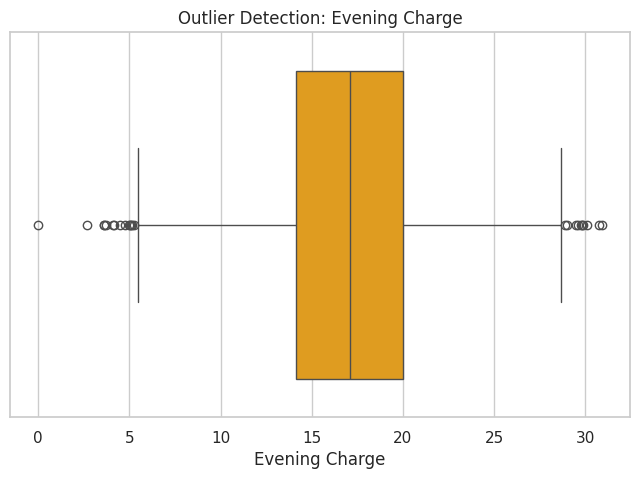

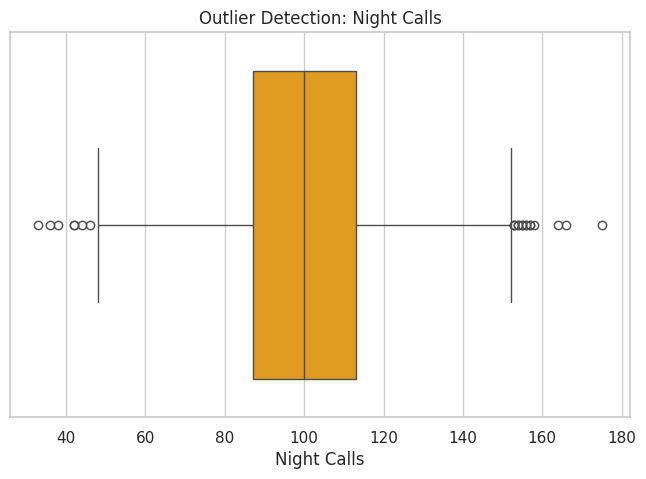

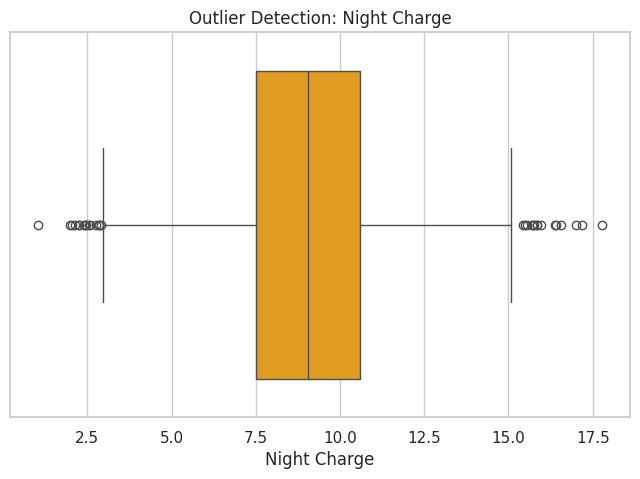

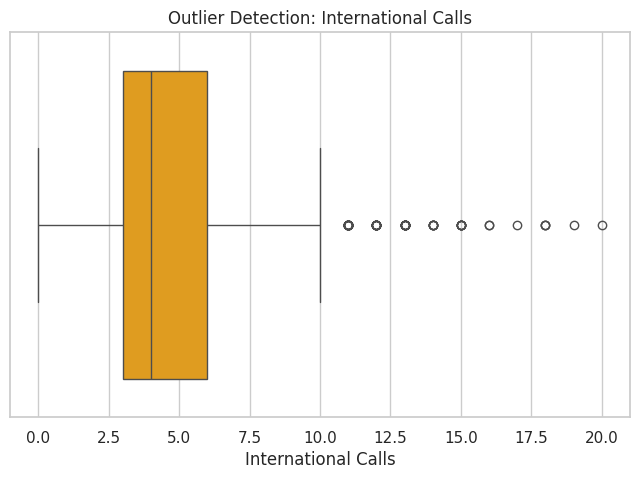

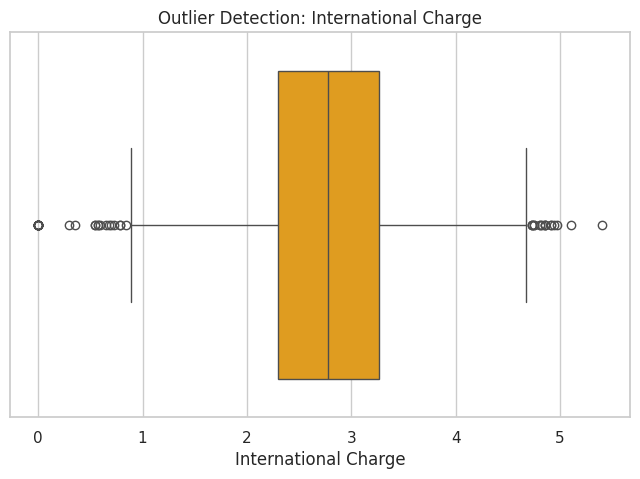

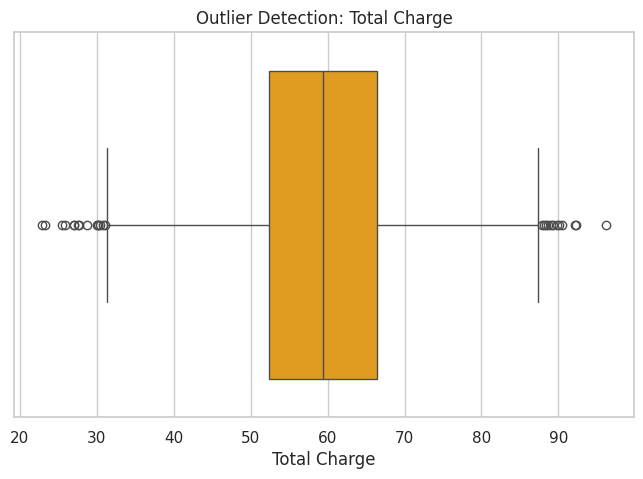

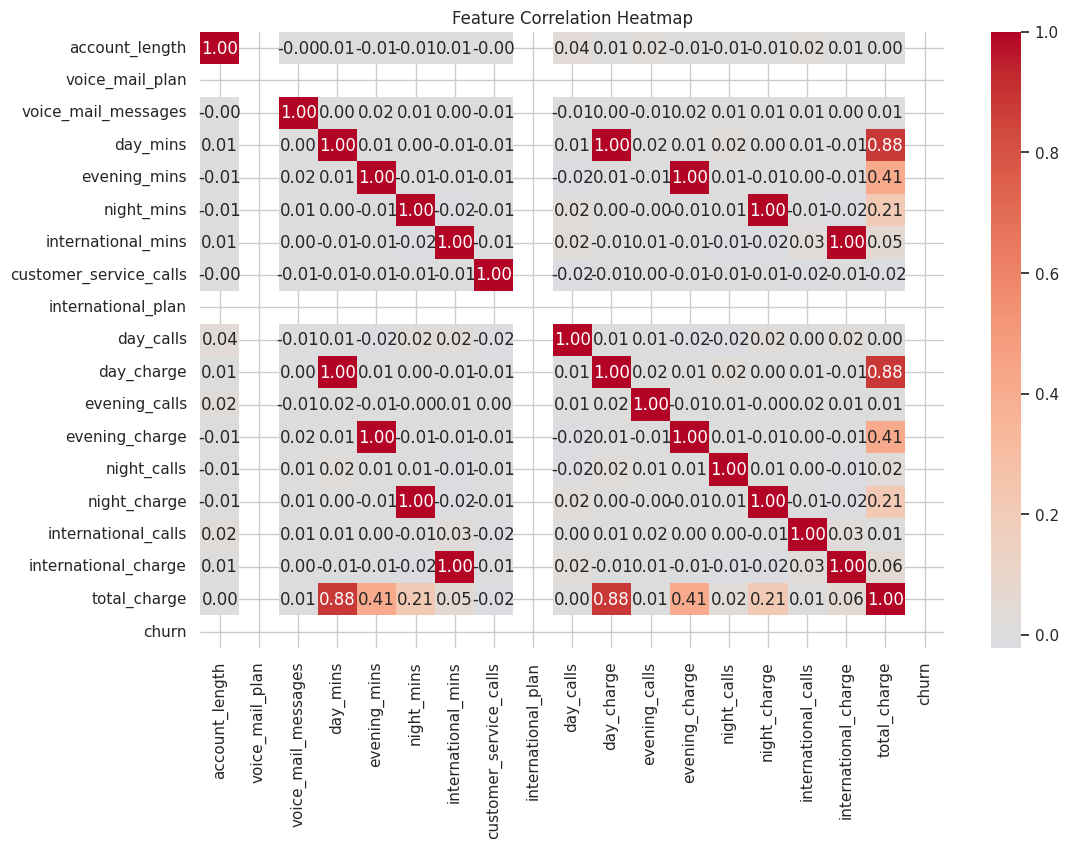

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# Missing Values Heatmap
if df.isnull().values.any():
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
    plt.title('Missing Values Heatmap')
    plt.show()
else:
    print(" No missing values detected.")

#  Distribution of Numeric Features
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    valid_data = df[col].dropna()
    if not valid_data.empty:
        plt.figure()
        sns.histplot(valid_data, kde=True, bins=30, color='skyblue')
        plt.title(f'Distribution of {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.ylabel('Frequency')
        plt.show()

#  Boxplots for Outliers
for col in numeric_cols:
    valid_data = df[col].dropna()
    if not valid_data.empty:
        plt.figure()
        sns.boxplot(x=valid_data, color='orange')
        plt.title(f'Outlier Detection: {col.replace("_", " ").title()}')
        plt.xlabel(col.replace("_", " ").title())
        plt.show()
# Correlation Heatmap (Fixed)
corr_matrix = df[numeric_cols].corr()
if not corr_matrix.empty and not corr_matrix.isnull().values.all():
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", center=0)
    plt.title('Feature Correlation Heatmap')
    plt.show()
else:
    print(" Correlation matrix is empty or invalid.")



In [ ]:
print(df.columns.tolist())


['account_length', 'voice_mail_plan', 'voice_mail_messages', 'day_mins', 'evening_mins', 'night_mins', 'international_mins', 'customer_service_calls', 'international_plan', 'day_calls', 'day_charge', 'evening_calls', 'evening_charge', 'night_calls', 'night_charge', 'international_calls', 'international_charge', 'total_charge', 'churn']


In [ ]:
df['churn'] = ((df['customer_service_calls'] > 3) & (df['account_length'] < 100)).astype(int)


In [ ]:
df_model = df[df['churn'].isin([0, 1])]
print(f"Valid samples for modeling: {len(df_model)}")


Valid samples for modeling: 3333


In [ ]:
#  Define X from df_model
import numpy as np
X = df_model.drop('churn', axis=1).select_dtypes(include=[np.number])

#  Check for missing and infinite values
print("Missing values per column:\n", X.isna().sum())
print("Infinite values per column:\n", np.isinf(X).sum())


Missing values per column:
 account_length               0
voice_mail_plan           3333
voice_mail_messages          0
day_mins                     0
evening_mins                 0
night_mins                   0
international_mins           0
customer_service_calls       0
international_plan        3333
day_calls                    0
day_charge                   0
evening_calls                0
evening_charge               0
night_calls                  0
night_charge                 0
international_calls          0
international_charge         0
total_charge                 0
dtype: int64
Infinite values per column:
 account_length            0
voice_mail_plan           0
voice_mail_messages       0
day_mins                  0
evening_mins              0
night_mins                0
international_mins        0
customer_service_calls    0
international_plan        0
day_calls                 0
day_charge                0
evening_calls             0
evening_charge            0
night_ca

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix

#  Prepare features and target
X = df_model.drop('churn', axis=1).select_dtypes(include=['number'])
y = df_model['churn']

#  Replace inf with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

#  Drop columns with all missing values
X = X.dropna(axis=1, how='all')

#  Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

#  Align target
y = y.loc[X.index]

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42, stratify=y
)

#  Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Train Random Forest model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

#  Step 9: Evaluate model
y_pred = model.predict(X_test_scaled)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))






 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       642
           1       1.00      1.00      1.00        25

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667

 Confusion Matrix:
[[642   0]
 [  0  25]]


In [ ]:

#  Step 9: Evaluate model
y_pred = model.predict(X_test_scaled)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))

print(" Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       642
           1       1.00      1.00      1.00        25

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667

 Confusion Matrix:
[[642   0]
 [  0  25]]


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

svm_model = SVC(class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

print("🔍 Support Vector Machine")
print(classification_report(y_test, svm_pred))
print(confusion_matrix(y_test, svm_pred))


🔍 Support Vector Machine
              precision    recall  f1-score   support

           0       0.99      0.58      0.74       642
           1       0.08      0.92      0.15        25

    accuracy                           0.60       667
   macro avg       0.54      0.75      0.44       667
weighted avg       0.96      0.60      0.71       667

[[375 267]
 [  2  23]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

print("🔍 Decision Tree")
print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))


🔍 Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       642
           1       1.00      1.00      1.00        25

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667

[[642   0]
 [  0  25]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict
knn_pred = knn_model.predict(X_test)

# Evaluation with zero_division=0 to suppress warnings
print("🔍 K-Nearest Neighbors")
print(classification_report(y_test, knn_pred, zero_division=0))
print(confusion_matrix(y_test, knn_pred))



🔍 K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       642
           1       0.00      0.00      0.00        25

    accuracy                           0.96       667
   macro avg       0.48      0.50      0.49       667
weighted avg       0.93      0.96      0.94       667

[[642   0]
 [ 25   0]]


In [ ]:
import joblib

joblib.dump(model, 'rf_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import joblib

# Define the feature list used for training
expected_features = ['account_length', 'customer_service_calls', 'total_charge']

# Save it for use in your Streamlit app
joblib.dump(expected_features, 'features.pkl')


['features.pkl']

link of the app

https://telecommunication-shqhrhmdthtvqqerfdjhk3.streamlit.app/